## PyTorch Exploration

Exploring PyTorch basics, e.g. manipulating tensors, loading data, and building basic NNs, from Raschka et al chapter 12

In [1]:
# importing torch stuff can take a couple minutes
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset, TensorDataset
import torchvision
import torchvision.transforms as transforms

import numpy as np
np.set_printoptions(precision=3)

import os
from itertools import islice
import matplotlib.pyplot as plt

In [2]:
# creating tensors
a = [1, 2, 3]
b = np.array([4, 5, 6], dtype = np.int32)

t_a = torch.tensor(a)
t_b = torch.from_numpy(b)

print(t_a)
print(t_b)

tensor([1, 2, 3])
tensor([4, 5, 6], dtype=torch.int32)


In [3]:
# tensors of ones and zeros or of random values
t_ones = torch.ones(2, 3)
print(t_ones.shape)
print(t_ones)
t_zeros = torch.zeros(2, 2, 2)
print(t_zeros)
rand_tensor = torch.rand(2, 3)
print(rand_tensor)

torch.Size([2, 3])
tensor([[1., 1., 1.],
        [1., 1., 1.]])
tensor([[[0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.]]])
tensor([[1.1736e-01, 6.3270e-01, 8.7293e-01],
        [3.9339e-06, 9.4821e-01, 8.3951e-01]])


### Manipulating the data type and shape of a tensor

In [4]:
# change int precision
t_a_new = t_a.to(torch.int64)
print(t_a_new.dtype)

torch.int64


In [5]:
# transposing tensors
t = torch.rand(3, 5)
t_tr = torch.transpose(t, 0, 1)
print(t.shape, ' ---> ', t_tr.shape)
t2 = torch.rand(3, 5, 2)
t2_tr = torch.transpose(t2, 1, 2)
print(t2.shape, ' ---> ', t2_tr.shape)

torch.Size([3, 5])  --->  torch.Size([5, 3])
torch.Size([3, 5, 2])  --->  torch.Size([3, 2, 5])


In [6]:
# reshaping torch tensors, similar to numpy arrays
t = torch.zeros(30)
t_reshape = t.reshape(5, 6)
print(t_reshape.shape)

torch.Size([5, 6])


In [7]:
# we can also "squeeze" dimensions -- removing dimensions of size 1, which are unnecessary
t = torch.zeros(1, 2, 1, 4, 1)
t_sqz = torch.squeeze(t, 2)
print(t.shape, ' ---> ', t_sqz.shape)
t_sqz2 = torch.squeeze(t_sqz, 1)  # does nothing since dimension 1 is not of size 1
print(t_sqz.shape, ' ---> ', t_sqz2.shape)

torch.Size([1, 2, 1, 4, 1])  --->  torch.Size([1, 2, 4, 1])
torch.Size([1, 2, 4, 1])  --->  torch.Size([1, 2, 4, 1])


### Applying mathematical transformations to tensors

In [8]:
# make some random tensors, using a random seed, then multiply them
torch.manual_seed(1)
t1 = 2 * torch.rand(5, 2) - 1
t2 = torch.normal(mean=0, std=1, size=(5, 2))
t3 = torch.multiply(t1, t2)  # element-wise multiply
print(t3)
print(t3.shape)

tensor([[ 0.4426, -0.3114],
        [ 0.0660, -0.5970],
        [ 1.1249,  0.0150],
        [ 0.1569,  0.7107],
        [-0.0451, -0.0352]])
torch.Size([5, 2])


In [9]:
# sum, mean, std
print(torch.mean(t1, axis=0))  # row-wise mean (one value per column)
print(torch.mean(t1, axis=1))  # column-wise mean (one value per row)
print(torch.sum(t1, axis=0))
print(torch.std(t1, axis=0))

tensor([-0.1373,  0.2028])
tensor([ 0.0369,  0.1378, -0.1709,  0.1515,  0.0083])
tensor([-0.6867,  1.0140])
tensor([0.5378, 0.4591])


In [10]:
# matrix multiplication
t5 = torch.matmul(t1, torch.transpose(t2, 0 ,1))
print(t5)

tensor([[ 0.1312,  0.3860, -0.6267, -1.0096, -0.2943],
        [ 0.1647, -0.5310,  0.2434,  0.8035,  0.1980],
        [-0.3855, -0.4422,  1.1399,  1.5558,  0.4781],
        [ 0.1822, -0.5771,  0.2585,  0.8676,  0.2132],
        [ 0.0330,  0.1084, -0.1692, -0.2771, -0.0804]])


In [11]:
# compute norms
print(torch.linalg.norm(t1, ord=2, dim=1))  # L2 norm of each row vector
print(torch.linalg.norm(t1, ord=1, dim=1))  # L1 norm of each row vector
print(torch.linalg.norm(t1, ord=2, dim=0))  # L2 norm of each column vector

tensor([0.6785, 0.5078, 1.1162, 0.5488, 0.1853])
tensor([0.9566, 0.6632, 1.5412, 0.7145, 0.2615])
tensor([1.1185, 1.0240])


### Split, stack, and concatenate tensors

In [12]:
# use torch.chunk to split a tensor into equally-sized chunks
torch.manual_seed(1)
t = torch.rand(6)
print(t)
t_splits = torch.chunk(t, 3)
print(t_splits)  # three equally-sized tensors
print([item.numpy() for item in t_splits])  # a list of the three tensors as numpy arrays
# can also chunk along a certain dimension
t2 = torch.rand(2, 6)
t2_splits = torch.chunk(t2, 3, dim=1)
print(t2_splits)

tensor([0.7576, 0.2793, 0.4031, 0.7347, 0.0293, 0.7999])
(tensor([0.7576, 0.2793]), tensor([0.4031, 0.7347]), tensor([0.0293, 0.7999]))
[array([0.758, 0.279], dtype=float32), array([0.403, 0.735], dtype=float32), array([0.029, 0.8  ], dtype=float32)]
(tensor([[0.3971, 0.7544],
        [0.6826, 0.3051]]), tensor([[0.5695, 0.4388],
        [0.4635, 0.4550]]), tensor([[0.6387, 0.5247],
        [0.5725, 0.4980]]))


In [13]:
# or, instead, use torch.split and provide specific sizes for each chunk
torch.manual_seed(1)
t = torch.rand(5)
print(t)
t_splits = torch.split(t, split_size_or_sections=[3, 2])
print([item.numpy() for item in t_splits])

tensor([0.7576, 0.2793, 0.4031, 0.7347, 0.0293])
[array([0.758, 0.279, 0.403], dtype=float32), array([0.735, 0.029], dtype=float32)]


In [14]:
# use torch.cat to concatenate tensors
A = torch.ones(3)
B = torch.zeros(2)
C = torch.cat([A, B], axis=0)
print(C)
D = torch.ones(3, 2)
E = torch.zeros(3, 3)
F = torch.cat([D, E], axis=1)  # concatenate matrices' columns (axis 1)
print(F)

tensor([1., 1., 1., 0., 0.])
tensor([[1., 1., 0., 0., 0.],
        [1., 1., 0., 0., 0.],
        [1., 1., 0., 0., 0.]])


In [15]:
# use stack to stack tensors along one another in a new axis
A = torch.ones(3)
B = torch.zeros(3)
C = torch.stack([A, B], axis=1)  # stack columns next to each other
print(C)
D = torch.ones(3, 3)
E = torch.zeros(3, 3)
F = torch.stack([D, E], axis=1)  
print(F)
print(F.shape)
# note how this increased the dimension -- we stack the columns of D and E along a new axis

tensor([[1., 0.],
        [1., 0.],
        [1., 0.]])
tensor([[[1., 1., 1.],
         [0., 0., 0.]],

        [[1., 1., 1.],
         [0., 0., 0.]],

        [[1., 1., 1.],
         [0., 0., 0.]]])
torch.Size([3, 2, 3])


## Building input pipelines

Here we go through ways to create datasets from tensors in memory, load them from the local disk, or download them from torchvision repositories.

### Creating a PyTorch DataLoader from existing tensors

In [16]:
# basic creation of DataLoader on a tensor that iterates through and draws one example at a time
t = torch.arange(6, dtype=torch.float32)
data_loader = DataLoader(t)

for item in data_loader:
    print(item)

tensor([0.])
tensor([1.])
tensor([2.])
tensor([3.])
tensor([4.])
tensor([5.])


In [17]:
# we can also load the data in batches
data_loader = DataLoader(t, batch_size=3, drop_last=False)

for i, batch in enumerate(data_loader, 1):
    print(f'batch {i}', batch)

batch 1 tensor([0., 1., 2.])
batch 2 tensor([3., 4., 5.])


We can also combine two or more tensors into a single dataset, e.g. if the data and labels are in separate tensors.

In [18]:
# we create a joint dataset class that specifies the tensors in our dataset 
#    and defines the length of the dataset and how items are drawn from it by generators like DataLoader

class JointDataset(Dataset):
    def __init__(self, x, y):
        self.x = x
        self.y = y
    def __len__(self):
        return(len(self.x))
    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]

In [19]:
# now we define a JointDataset from data and labels (X, y) and load from it
torch.manual_seed(1)

t_x = torch.rand([4, 3], dtype=torch.float32)
t_y = torch.arange(4)
joint_dataset = JointDataset(t_x, t_y)

# if we have the specific structure of data and labels, then we can use the
#    built-in TensorDataset class, and we don't need our custom class
joint_dataset = TensorDataset(t_x, t_y)

for example in joint_dataset:
    print('  x: ', example[0], 
          '  y: ', example[1])

  x:  tensor([0.7576, 0.2793, 0.4031])   y:  tensor(0)
  x:  tensor([0.7347, 0.0293, 0.7999])   y:  tensor(1)
  x:  tensor([0.3971, 0.7544, 0.5695])   y:  tensor(2)
  x:  tensor([0.4388, 0.6387, 0.5247])   y:  tensor(3)


In [20]:
# we can also load data in a shuffled manner, which we need for stochastic gradient descent to avoid cycles
# finally, we can iterate over multiple epochs
torch.manual_seed(1)
data_loader = DataLoader(dataset=joint_dataset, batch_size=2, shuffle=True)
   
for epoch in range(2):
    print(f'epoch {epoch+1}')
    for i, batch in enumerate(data_loader, 1):
        print(f'batch {i}:', 'x:', batch[0], 
              '\n         y:', batch[1])

epoch 1
batch 1: x: tensor([[0.3971, 0.7544, 0.5695],
        [0.7576, 0.2793, 0.4031]]) 
         y: tensor([2, 0])
batch 2: x: tensor([[0.7347, 0.0293, 0.7999],
        [0.4388, 0.6387, 0.5247]]) 
         y: tensor([1, 3])
epoch 2
batch 1: x: tensor([[0.7576, 0.2793, 0.4031],
        [0.3971, 0.7544, 0.5695]]) 
         y: tensor([0, 2])
batch 2: x: tensor([[0.7347, 0.0293, 0.7999],
        [0.4388, 0.6387, 0.5247]]) 
         y: tensor([1, 3])


### Creating a dataset from files on your local storage disk

You can also create datasets from locally-stored files. I am skipping this for now.

### Fetching available datasets from the torchvision.datasets library

There are many freely-available and nicely-annotated image datasets available from the torchvision package, and online at pytorch.org/vision/stable/datasets.html. Similarly, the torchtext package has text-based datasets. All these datasets are already PyTorch DataLoader classes, so we can load them similarly to how we did before, once downloaded.

Here we will use torchvision as an example, and specifically focus on downloading the CelebA (celebrity face images) and MNIST (digit handwriting) image datasets.

CelebA images are stored in the PIL.Image format, and have several features such as 'attributes' (40 facial attributes), 'identity' (the person whose image it is), and 'landmarks' (which has landmakrs such as eyes, nose, and mouth locations).

In [25]:
# here we download the CelebA dataset from torchvision
# image_path = './'
# celeba_dataset = torchvision.datasets.CelebA(image_path, split='train', target_type='attr', download=True)

# note: the above sometimes fails because too many people are downloading the data at once, or GDrive limits it
# so as a workaround we need to download the data manually
# for details see: https://github.com/rasbt/machine-learning-book/blob/main/ch12/ch12_part1.ipynb
image_path = '../datasets/'
celeba_dataset = torchvision.datasets.CelebA(image_path, split='train', target_type='attr', download=False)
assert isinstance(celeba_dataset, torch.utils.data.Dataset)  # make sure it's a torch Dataset object

In [26]:
# take a look at an example image in raw format, get type info (we see it's a PIL image)
example = next(iter(celeba_dataset))
print(example)

(<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=178x218 at 0x1AFF48705F0>, tensor([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
        1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1]))


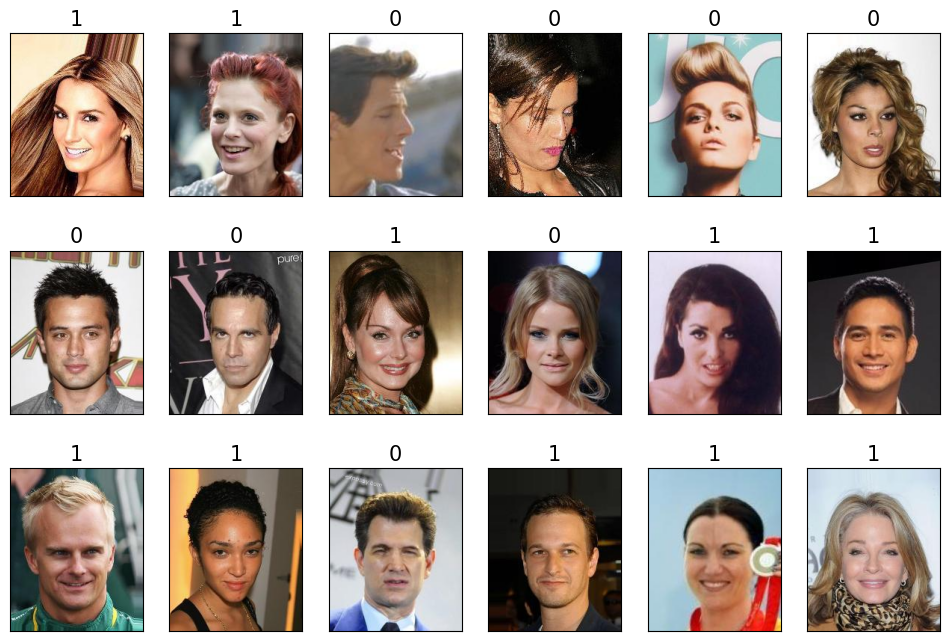

In [ ]:
# we can grab a few examples and plot them in pyplot to visualize
# we also display the label for attribute 31, "smiling". should be 1 if the person is smiling, 0 if not.
fig = plt.figure(figsize=(12, 8))
# draw 18 example images via islice, with the index i coming from enumerate
for i, (image, attributes) in islice(enumerate(celeba_dataset), 18):
    ax = fig.add_subplot(3, 6, i+1)
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(image)
    ax.set_title(f'{attributes[31]}', size=15)

#plt.savefig('figures/12_05.pdf')
plt.show()